<a href="https://colab.research.google.com/github/rajuiit/TemplateMaching/blob/main/templatematching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/img061-00014.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('gdrive/My Drive/Colab Notebooks/templatematching/res.png',img_rgb)

True

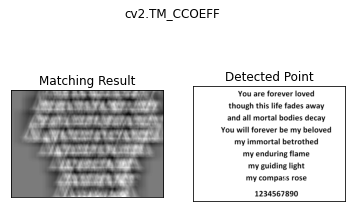

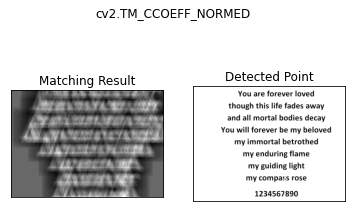

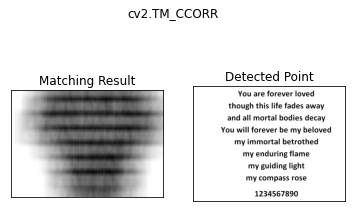

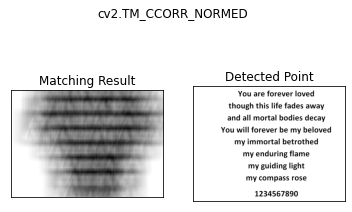

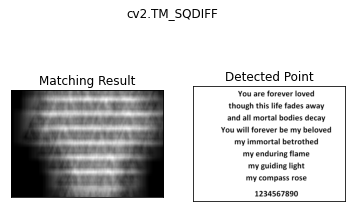

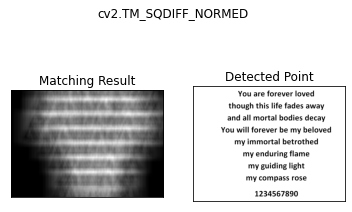

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp',0)
img2 = img.copy()
template = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/img061-00014.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

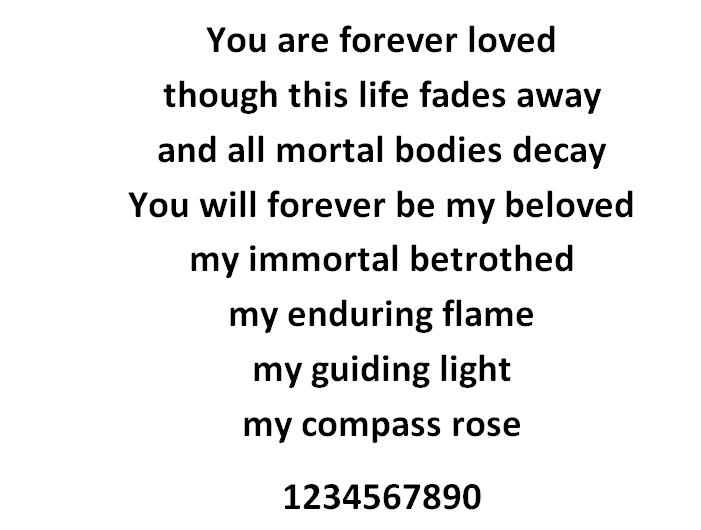

In [ ]:
# Python program to illustrate  
# template matching 
import cv2 
import numpy as np 
  
# Read the main image 
img_rgb = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')
  
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
  
# Read the template 
template = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/img061-00014.png',0) 
  
# Store width and height of template in w and h 
w, h = template.shape[::-1] 
  
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#plt.imshow(res, cmap='gray') 
  
# Specify a threshold 
threshold = 0.8
  
# Store the coordinates of matched area in a numpy array 
loc = np.where( res >= threshold)  
  
# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 
  
# Show the final image with the matched area. 
cv2_imshow(img_rgb)

In [ ]:
print(pytesseract.image_to_string(img_cv, lang='eng', config='-psm 1'))

You are forever loved
though this life fades away
and all mortal bodies decay

You will forever be my beloved
my immortal betrothed
my enduring flame
my guiding light
my compass rose

1234567890



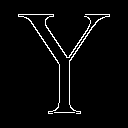

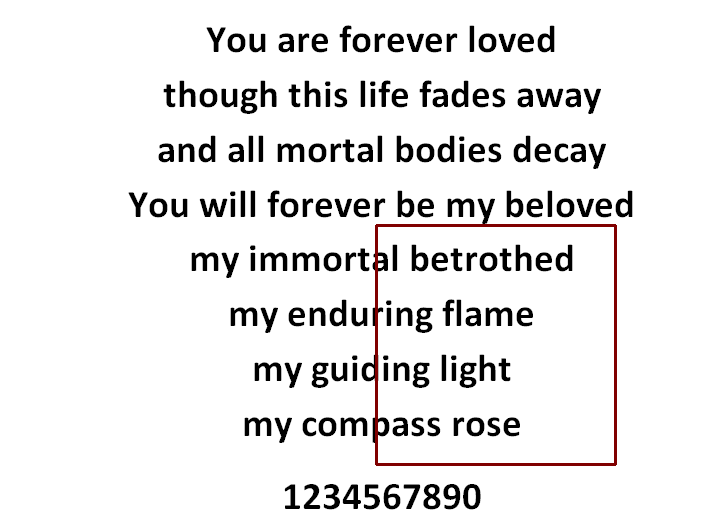

-1

In [ ]:
# USAGE
# python match.py --template cod_logo.png --images images

# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2

#New template
template2 = cv2.imread("gdrive/My Drive/Colab Notebooks/templatematching/img062-00010.png")

# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--template", required=True, help="Path to template image")
# ap.add_argument("-i", "--images", required=True,
#     help="Path to images dir where template will be matched")
# ap.add_argument("-v", "--visualize",
#     help="Flag 0 or 1 indicating whether or not to visualize each iteration")
# args = vars(ap.parse_args())

# load the image image, convert it to grayscale, and detect edges
template = cv2.imread("gdrive/My Drive/Colab Notebooks/templatematching/img061-00813.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2_imshow(template)

# loop over the images to find the template in
#for imagePath in glob.glob(args\["images"\] + "/*.*"):
    # load the image, convert it to grayscale, and initialize the
    # bookkeeping variable to keep track of the matched region
image = cv2.imread("gdrive/My Drive/Colab Notebooks/templatematching/3.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None

# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    # check to see if the iteration should be visualized
    '''
    if args.get("visualize", False):
        # draw a bounding box around the detected region
        clone = np.dstack(\[edged, edged, edged\])
        cv2.rectangle(clone, (maxLoc\[0\], maxLoc\[1\]),
            (maxLoc\[0\] + tW, maxLoc\[1\] + tH), (0, 0, 255), 2)
        cv2.imshow("Visualize", clone)
        cv2.waitKey(0)'''

    # if we have found a new maximum correlation value, then ipdate
    # the bookkeeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

#MY CODE
image2 = image.copy()
resizedTemplate = cv2.resize(template2, (endX-startX, endY-startY), interpolation = cv2.INTER_AREA)
roi = image2[startY:endY, startX:endX]
img = cv2.addWeighted(resizedTemplate, 1, roi, 0, 0)
image2[startY:endY, startX:endX] = img


# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 128), 2)
cv2_imshow(image)
#cv2_imshow(image2)
#cv2_imshow(resizedTemplate)
cv2.waitKey(0)

In [ ]:
pip install pytesseract

In [ ]:
pip install tesseract

     |████████████████████████████████| 45.6MB 96kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=71ef8118ba3513198d50e69113ec807db6d994937308564b34aa331f67a46634
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [ ]:
import cv2 
import pytesseract

In [ ]:
import cv2
import numpy as np

image = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    return cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)    
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [ ]:
deskew = deskew(image)
gray = get_grayscale(deskew)
thresh = thresholding(gray)
rnoise = remove_noise(gray)
dilate = dilate(gray)
erode = erode(gray)
opening = opening(gray)
canny = canny(gray)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
   
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
show_images(image, 3, ["gray","rnoise","dilate","erode","thresh","deskew","opening","canny"])

AssertionError: ignored

In [ ]:
!pip3 install pytesseract
!pip3 install tesseract-ocr
!pip3 install libtesseract-dev

  Using cached https://files.pythonhosted.org/packages/e2/0d/dcee3dd0fc4c7bcd18125a98f8ba6d9db7aecaa40770595203e312649587/tesseract-ocr-0.0.1.tar.gz
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-4ix9grgp/tesseract-ocr/setup.py'"'"'; __file__='"'"'/tmp/pip-install-4ix9grgp/tesseract-ocr/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-3v3yrw6g/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.
ERROR: Could not find a version that satisfies the requirement libtesseract-dev (from versions: none)
ERROR: No match

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

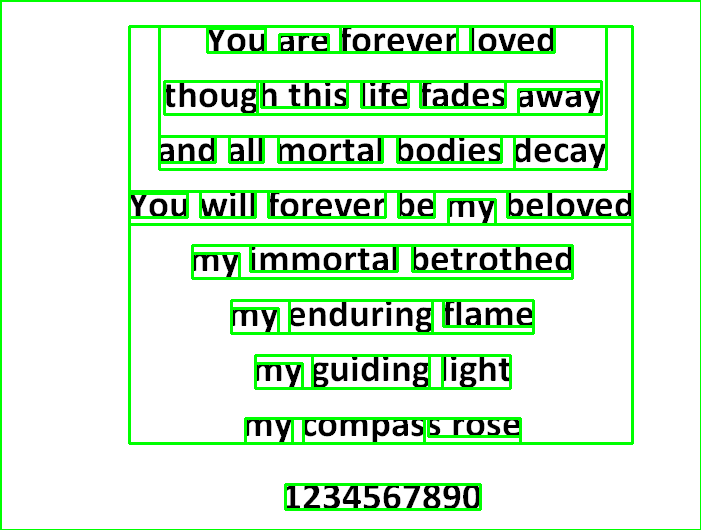

-1

In [ ]:
import pytesseract
from pytesseract import Output
import cv2
img = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [ ]:
img_cv = cv2.imread(r'gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')

In [ ]:
print(pytesseract.image_to_string(img_cv, lang='eng', config='-psm 1'))

You are forever loved
though this life fades away
and all mortal bodies decay

You will forever be my beloved
my immortal betrothed
my enduring flame
my guiding light
my compass rose

1234567890



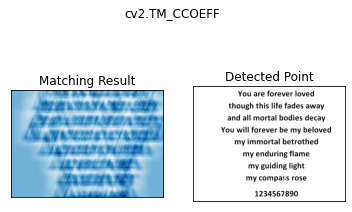

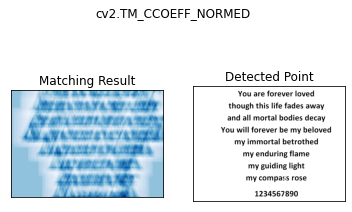

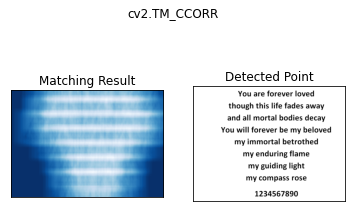

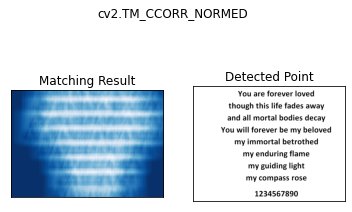

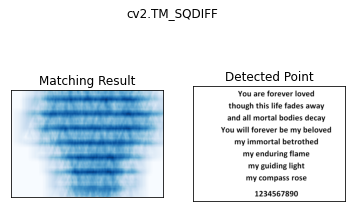

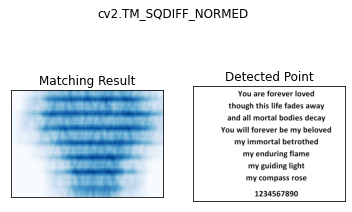

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp',0)
img2 = img.copy()
template = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/img061-00014.png',0)
w, h = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'Blues')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

sought













evay





oy





















































away |

ey

oH

or

wav

wey

vey


vey

vey

vey

vey

vey

vey

vey

vey

vey

ver

i

ad

ad

ad

ad

ad

ad

ar

ay

Pexy

Pexy

Pexy

perp

ad

=

ad

Lay

Lay

Lay

Lay

Lay

Lay

erp

a

a

a

bey

Peay

ray

ad

ad

ad

ad

ey

ey

ey

ey

ray

ray

—

per

Loy

Loy

Loy

Loy

Loy

say

say

say

say

say

_

art

pee

pee

Los

Los

Los

Los

Los

om

om

om

om

om

om

rm

om

pee

pee

Ls

Ls

Ls

beep

beep

beep

beep

beep

beep

us

rg

as

pee

ata

L—

L—

L—

ro

ro

ro

ro

ro

ro

ro

ro

ray

ra

ee

he

[

[

fo

fo

fo

fo

fo

fo

fo

fo

-_

-_

so

so

so

so

so

so

so

so

ra

-

ro

ro

ro

ro

ro

ro

ro

ro

-

-

ro

ro

ro

ro

ro

ro

ro

ro


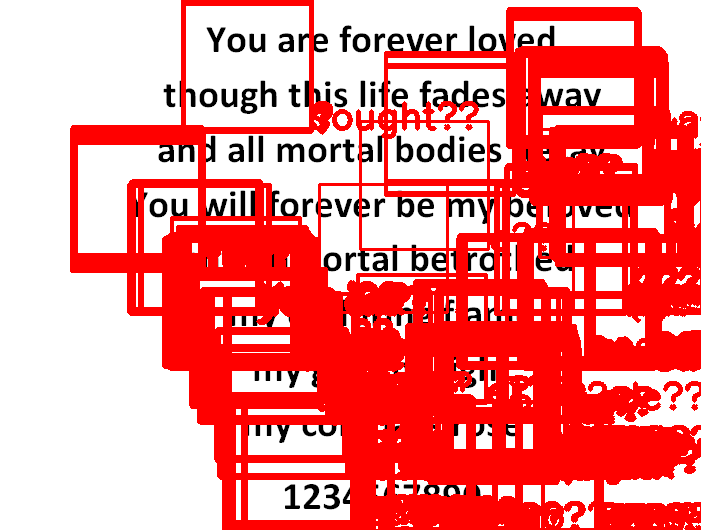

In [ ]:
img_rgb = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/3.bmp')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('gdrive/My Drive/Colab Notebooks/templatematching/img061-00813.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.1
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    roi = img_rgb[pt[1]:pt[1] + h, pt[0]: pt[0] + w]
    config = "-l eng --oem 1 --psm 7"
    text = pytesseract.image_to_string(roi, config=config)
    print(text)
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    cv2.putText(img_rgb, text, (pt[0] + w, pt[1] + h),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

cv2_imshow(img_rgb)